In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf # Library to construct neural newtorks. Low level library
from tensorflow import keras # High level library to handle tensorflow.
from tensorflow.keras.layers import Flatten, Dense, Dropout # Types of layers to use in our neural network.

import warnings
warnings.filterwarnings("ignore")

# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [215]:
import pandas as pd

In [216]:
data = pd.read_csv('tic-tac-toe.csv')

In [217]:
data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [218]:
X = data.drop(columns = 'class')
y = data['class']

In [219]:
def function(x):
    if x == 'x':
        return 1
    elif x == 'o':
        return 0
    else:
        return -1

for col in X.columns:
    X[col] = X[col].apply(lambda x: function(x))

In [220]:
X

,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,1,1,1,1,0,0,1,0,0
1,1,1,1,1,0,0,0,1,0
2,1,1,1,1,0,0,0,0,1
3,1,1,1,1,0,0,0,-1,-1
4,1,1,1,1,0,0,-1,0,-1
...,...,...,...,...,...,...,...,...,...
953,0,1,1,1,0,0,0,1,1
954,0,1,0,1,1,0,1,0,1
955,0,1,0,1,0,1,1,0,1
956,0,1,0,0,1,1,1,0,1


In [221]:
y

0       True
1       True
2       True
3       True
4       True
       ...  
953    False
954    False
955    False
956    False
957    False
Name: class, Length: 958, dtype: bool

In [222]:
# y = y.apply(lambda x: int(x))

In [223]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 958 entries, 0 to 957
Series name: class
Non-Null Count  Dtype
--------------  -----
958 non-null    bool 
dtypes: bool(1)
memory usage: 1.1 KB


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [224]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

print(X_train.shape)
print(X_test.shape)

(670, 9)
(288, 9)


In [225]:
data2 = pd.concat([X,y],axis = 1)

In [407]:
# Callbacks are Keras tools to kepp track of the training progress

from tensorflow.keras.callbacks import EarlyStopping # This callback allows you to stop the training if the validation error increases
from tensorflow.keras.callbacks import ModelCheckpoint # This callback allows you to save the model.

early_stopping = EarlyStopping(patience=5) 

model = keras.Sequential()
model.add(Dense(units = 9,input_dim = X_train.shape[1],activation='relu'))
model.add(Dense(units = 3,activation='relu'))
model.add(Dense(units = 1, activation='relu'))

model.compile(optimizer='adam', # Optimization method
              loss='mse', # Error metric to minimize
              metrics=['accuracy'] # Error matrics to report. But only the "loss" will be used for minimization.
              )

model.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_268 (Dense)           (None, 9)                 90        
                                                                 
 dense_269 (Dense)           (None, 3)                 30        
                                                                 
 dense_270 (Dense)           (None, 1)                 4         
                                                                 
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________


In [408]:
checkpoint_path = 'reg-nn1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path, # Where to save the checkpoint.
    save_freq='epoch', # How often the checkpoint file will be saved.
    save_weights_only=False, # Wether or not save only the weitgths of each neuron.
    verbose=1 # To display the progress
)

In [409]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=60, # Number of epochs. 
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    batch_size=5, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.4434 - accuracy: 0.3806 - val_loss: 0.3951 - val_accuracy: 0.4627 - 332ms/epoch - 3ms/step
Epoch 2/60

Epoch 2: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.3280 - accuracy: 0.5317 - val_loss: 0.3420 - val_accuracy: 0.5299 - 90ms/epoch - 829us/step
Epoch 3/60

Epoch 3: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.2914 - accuracy: 0.5728 - val_loss: 0.3161 - val_accuracy: 0.5672 - 97ms/epoch - 902us/step
Epoch 4/60

Epoch 4: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.2655 - accuracy: 0.5933 - val_loss: 0.2969 - val_accuracy: 0.5597 - 95ms/epoch - 879us/step
Epoch 5/60

Epoch 5: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.2450 - accuracy: 0.6213 - val_loss: 0.2735 - val_accuracy: 0.5896 - 95ms/epoch - 884us/step
Epoch 6/60

Epoch 6: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.2317 - accuracy: 0.6493 - val_loss: 0.2531 - val_accuracy: 0.6119 - 89ms/epoch - 825us/step
Epoch 7/60


108/108 - 0s - loss: 0.1092 - accuracy: 0.8675 - val_loss: 0.1213 - val_accuracy: 0.8284 - 83ms/epoch - 764us/step
Epoch 51/60

Epoch 51: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.1085 - accuracy: 0.8713 - val_loss: 0.1216 - val_accuracy: 0.8433 - 85ms/epoch - 790us/step
Epoch 52/60

Epoch 52: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.1075 - accuracy: 0.8713 - val_loss: 0.1218 - val_accuracy: 0.8284 - 93ms/epoch - 865us/step
Epoch 53/60

Epoch 53: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.1070 - accuracy: 0.8806 - val_loss: 0.1203 - val_accuracy: 0.8507 - 98ms/epoch - 908us/step
Epoch 54/60

Epoch 54: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.1064 - accuracy: 0.8787 - val_loss: 0.1222 - val_accuracy: 0.8358 - 87ms/epoch - 807us/step
Epoch 55/60

Epoch 55: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.1053 - accuracy: 0.8750 - val_loss: 0.1197 - val_accuracy: 0.8358 - 94ms/epoch - 872us/step
Epoch 56/60

Epoch 56: saving model to reg-nn1.hdf

In [410]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

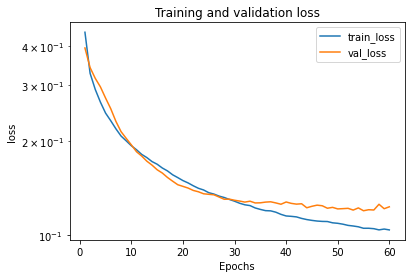

In [411]:
plot_metric(history,'loss')

Categorical cross entropy gives nan, the model is not ok, i used mse

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [412]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train.tolist(), 'Predicted': y_pred_train.tolist()})
    df_test  = pd.DataFrame({'Real': y_test.tolist(),  'Predicted': y_pred_test.tolist()})

    return performance, df_train, df_test



In [413]:
y_pred_train_nn1 = model.predict(X_train)
y_pred_test_nn1  = model.predict(X_test)

y_train = np.array(y_train).reshape(-1,1)
y_test  = np.array(y_test).reshape(-1,1)

results, df1, df2 = model_performance(y_train, y_pred_train_nn1, y_test, y_pred_test_nn1)
results

,Error_metric,Train,Test
0,Mean error,-0.04,-0.09
1,Mean absolute error,0.24,0.30
2,Mean squared error,0.11,0.16
3,Root mean squared error,0.32,0.40
4,Mean absolute percentual error,NaN,NaN
5,R2,0.53,0.30


In [414]:
X_test_2 = X_test.copy()
X_test_2['result'] = y_pred_test_nn1
X_test_2

,TL,TM,TR,ML,MM,MR,BL,BM,BR,result
676,1,0,1,1,0,-1,0,0,1,0.38
765,0,1,1,0,-1,-1,0,1,-1,0.37
253,1,-1,0,1,0,-1,1,-1,-1,1.15
871,0,-1,-1,1,0,1,1,-1,0,0.53
558,-1,0,1,-1,0,1,-1,-1,1,0.84
...,...,...,...,...,...,...,...,...,...,...
71,1,1,1,-1,-1,0,0,0,1,1.07
857,0,-1,1,0,1,1,0,-1,-1,0.92
334,0,1,0,0,0,1,1,1,1,0.36
499,-1,1,0,1,1,0,0,1,-1,0.80


In [415]:
X_test_2

,TL,TM,TR,ML,MM,MR,BL,BM,BR,result
676,1,0,1,1,0,-1,0,0,1,0.38
765,0,1,1,0,-1,-1,0,1,-1,0.37
253,1,-1,0,1,0,-1,1,-1,-1,1.15
871,0,-1,-1,1,0,1,1,-1,0,0.53
558,-1,0,1,-1,0,1,-1,-1,1,0.84
...,...,...,...,...,...,...,...,...,...,...
71,1,1,1,-1,-1,0,0,0,1,1.07
857,0,-1,1,0,1,1,0,-1,-1,0.92
334,0,1,0,0,0,1,1,1,1,0.36
499,-1,1,0,1,1,0,0,1,-1,0.80


It looks like it could be improved

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [435]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.1)

In [541]:
early_stopping = EarlyStopping(patience=5) 

model = keras.Sequential()
model.add(Dense(units = 9,input_dim = X_train.shape[1],activation='relu'))
model.add(Dense(units = 3,activation='relu'))
model.add(Dense(units = 1, activation='relu'))

model.compile(optimizer='adam', # Optimization method
              loss='mse', # Error metric to minimize
              metrics=['accuracy'] # Error matrics to report. But only the "loss" will be used for minimization.
              )

model.summary()

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_328 (Dense)           (None, 9)                 90        
                                                                 
 dense_329 (Dense)           (None, 3)                 30        
                                                                 
 dense_330 (Dense)           (None, 1)                 4         
                                                                 
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________


In [542]:
checkpoint_path = 'reg-nn1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path, # Where to save the checkpoint.
    save_freq='epoch', # How often the checkpoint file will be saved.
    save_weights_only=False, # Wether or not save only the weitgths of each neuron.
    verbose=1 # To display the progress
)

In [543]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=60, # Number of epochs. 
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV
    batch_size=5, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.3650 - accuracy: 0.4720 - val_loss: 0.3110 - val_accuracy: 0.5522 - 352ms/epoch - 3ms/step
Epoch 2/60

Epoch 2: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.2966 - accuracy: 0.5560 - val_loss: 0.2599 - val_accuracy: 0.5896 - 96ms/epoch - 890us/step
Epoch 3/60

Epoch 3: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.2527 - accuracy: 0.6138 - val_loss: 0.2236 - val_accuracy: 0.6194 - 102ms/epoch - 946us/step
Epoch 4/60

Epoch 4: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.2273 - accuracy: 0.6567 - val_loss: 0.2101 - val_accuracy: 0.6493 - 91ms/epoch - 841us/step
Epoch 5/60

Epoch 5: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.2143 - accuracy: 0.6735 - val_loss: 0.2044 - val_accuracy: 0.6791 - 104ms/epoch - 960us/step
Epoch 6/60

Epoch 6: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.2060 - accuracy: 0.6978 - val_loss: 0.2020 - val_accuracy: 0.6791 - 91ms/epoch - 843us/step
Epoch 7/6

108/108 - 0s - loss: 0.1253 - accuracy: 0.8302 - val_loss: 0.1580 - val_accuracy: 0.8060 - 105ms/epoch - 970us/step
Epoch 51/60

Epoch 51: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.1243 - accuracy: 0.8284 - val_loss: 0.1570 - val_accuracy: 0.8060 - 100ms/epoch - 927us/step
Epoch 52/60

Epoch 52: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.1240 - accuracy: 0.8340 - val_loss: 0.1548 - val_accuracy: 0.8060 - 92ms/epoch - 850us/step
Epoch 53/60

Epoch 53: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.1221 - accuracy: 0.8284 - val_loss: 0.1553 - val_accuracy: 0.7985 - 90ms/epoch - 835us/step
Epoch 54/60

Epoch 54: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.1210 - accuracy: 0.8377 - val_loss: 0.1518 - val_accuracy: 0.8060 - 100ms/epoch - 925us/step
Epoch 55/60

Epoch 55: saving model to reg-nn1.hdf5
108/108 - 0s - loss: 0.1196 - accuracy: 0.8489 - val_loss: 0.1524 - val_accuracy: 0.8060 - 97ms/epoch - 900us/step
Epoch 56/60

Epoch 56: saving model to reg-nn1.

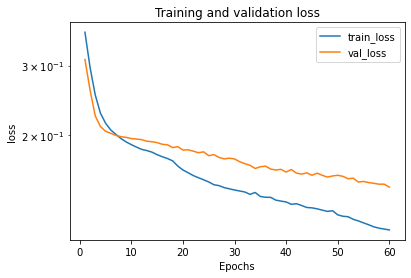

In [544]:
plot_metric(history,'loss')

**Which approach(es) did you find helpful to improve your model performance?**

In [545]:
y_pred_train_nn1 = model.predict(X_train)
y_pred_test_nn1  = model.predict(X_test)

y_train = np.array(y_train).reshape(-1,1)
y_test  = np.array(y_test).reshape(-1,1)

results, df1, df2 = model_performance(y_train, y_pred_train_nn1, y_test, y_pred_test_nn1)
results

,Error_metric,Train,Test
0,Mean error,-0.01,-0.07
1,Mean absolute error,0.26,0.34
2,Mean squared error,0.12,0.19
3,Root mean squared error,0.34,0.44
4,Mean absolute percentual error,NaN,NaN
5,R2,0.47,0.19


In [535]:
X_test_2 = X_test.copy()
X_test_2['result'] = y_pred_test_nn1
X_test_2

,TL,TM,TR,ML,MM,MR,BL,BM,BR,result
676,1,0,1,1,0,-1,0,0,1,0.66
765,0,1,1,0,-1,-1,0,1,-1,0.62
253,1,-1,0,1,0,-1,1,-1,-1,0.84
871,0,-1,-1,1,0,1,1,-1,0,0.73
558,-1,0,1,-1,0,1,-1,-1,1,1.00
...,...,...,...,...,...,...,...,...,...,...
71,1,1,1,-1,-1,0,0,0,1,0.61
857,0,-1,1,0,1,1,0,-1,-1,0.89
334,0,1,0,0,0,1,1,1,1,0.40
499,-1,1,0,1,1,0,0,1,-1,0.52


Still not the best result